In [1]:
import os
os.chdir('/root/awid_dataset/')
import pandas as pd
import numpy as np
import csv
import os
import time
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 5.0)

# Read in the CSV files
dataset_columns = ['frame.interface_id',	'frame.dlt',	'frame.offset_shift',	'frame.time_epoch',	'frame.time_delta',	'frame.time_delta_displayed',	'frame.time_relative',	'frame.len',	'frame.cap_len',	'frame.marked',	'frame.ignored',	'radiotap.version',	'radiotap.pad',	'radiotap.length',	'radiotap.present.tsft',	'radiotap.present.flags',	'radiotap.present.rate',	'radiotap.present.channel',	'radiotap.present.fhss',	'radiotap.present.dbm_antsignal',	'radiotap.present.dbm_antnoise',	'radiotap.present.lock_quality',	'radiotap.present.tx_attenuation',	'radiotap.present.db_tx_attenuation',	'radiotap.present.dbm_tx_power',	'radiotap.present.antenna',	'radiotap.present.db_antsignal',	'radiotap.present.db_antnoise',	'radiotap.present.rxflags',	'radiotap.present.xchannel',	'radiotap.present.mcs',	'radiotap.present.ampdu',	'radiotap.present.vht',	'radiotap.present.reserved',	'radiotap.present.rtap_ns',	'radiotap.present.vendor_ns',	'radiotap.present.ext',	'radiotap.mactime',	'radiotap.flags.cfp',	'radiotap.flags.preamble',	'radiotap.flags.wep',	'radiotap.flags.frag',	'radiotap.flags.fcs',	'radiotap.flags.datapad',	'radiotap.flags.badfcs',	'radiotap.flags.shortgi',	'radiotap.datarate',	'radiotap.channel.freq',	'radiotap.channel.type.turbo',	'radiotap.channel.type.cck',	'radiotap.channel.type.ofdm',	'radiotap.channel.type.2ghz',	'radiotap.channel.type.5ghz',	'radiotap.channel.type.passive',	'radiotap.channel.type.dynamic',	'radiotap.channel.type.gfsk',	'radiotap.channel.type.gsm',	'radiotap.channel.type.sturbo',	'radiotap.channel.type.half',	'radiotap.channel.type.quarter',	'radiotap.dbm_antsignal',	'radiotap.antenna',	'radiotap.rxflags.badplcp',	'wlan.fc.type_subtype',	'wlan.fc.version',	'wlan.fc.type',	'wlan.fc.subtype',	'wlan.fc.ds',	'wlan.fc.frag',	'wlan.fc.retry',	'wlan.fc.pwrmgt',	'wlan.fc.moredata',	'wlan.fc.protected',	'wlan.fc.order',	'wlan.duration',	'wlan.ra',	'wlan.da',	'wlan.ta',	'wlan.sa',	'wlan.bssid',	'wlan.frag',	'wlan.seq',	'wlan.bar.type',	'wlan.ba.control.ackpolicy',	'wlan.ba.control.multitid',	'wlan.ba.control.cbitmap',	'wlan.bar.compressed.tidinfo',	'wlan.ba.bm',	'wlan.fcs_good',	'wlan_mgt.fixed.capabilities.ess',	'wlan_mgt.fixed.capabilities.ibss',	'wlan_mgt.fixed.capabilities.cfpoll.ap',	'wlan_mgt.fixed.capabilities.privacy',	'wlan_mgt.fixed.capabilities.preamble',	'wlan_mgt.fixed.capabilities.pbcc',	'wlan_mgt.fixed.capabilities.agility',	'wlan_mgt.fixed.capabilities.spec_man',	'wlan_mgt.fixed.capabilities.short_slot_time',	'wlan_mgt.fixed.capabilities.apsd',	'wlan_mgt.fixed.capabilities.radio_measurement',	'wlan_mgt.fixed.capabilities.dsss_ofdm',	'wlan_mgt.fixed.capabilities.del_blk_ack',	'wlan_mgt.fixed.capabilities.imm_blk_ack',	'wlan_mgt.fixed.listen_ival',	'wlan_mgt.fixed.current_ap',	'wlan_mgt.fixed.status_code',	'wlan_mgt.fixed.timestamp',	'wlan_mgt.fixed.beacon',	'wlan_mgt.fixed.aid',	'wlan_mgt.fixed.reason_code',	'wlan_mgt.fixed.auth.alg',	'wlan_mgt.fixed.auth_seq',	'wlan_mgt.fixed.category_code',	'wlan_mgt.fixed.htact',	'wlan_mgt.fixed.chanwidth',	'wlan_mgt.fixed.fragment',	'wlan_mgt.fixed.sequence',	'wlan_mgt.tagged.all',	'wlan_mgt.ssid',	'wlan_mgt.ds.current_channel',	'wlan_mgt.tim.dtim_count',	'wlan_mgt.tim.dtim_period',	'wlan_mgt.tim.bmapctl.multicast',	'wlan_mgt.tim.bmapctl.offset',	'wlan_mgt.country_info.environment',	'wlan_mgt.rsn.version',	'wlan_mgt.rsn.gcs.type',	'wlan_mgt.rsn.pcs.count',	'wlan_mgt.rsn.akms.count',	'wlan_mgt.rsn.akms.type',	'wlan_mgt.rsn.capabilities.preauth',	'wlan_mgt.rsn.capabilities.no_pairwise',	'wlan_mgt.rsn.capabilities.ptksa_replay_counter',	'wlan_mgt.rsn.capabilities.gtksa_replay_counter',	'wlan_mgt.rsn.capabilities.mfpr',	'wlan_mgt.rsn.capabilities.mfpc',	'wlan_mgt.rsn.capabilities.peerkey',	'wlan_mgt.tcprep.trsmt_pow',	'wlan_mgt.tcprep.link_mrg',	'wlan.wep.iv',	'wlan.wep.key',	'wlan.wep.icv',	'wlan.tkip.extiv',	'wlan.ccmp.extiv',	'wlan.qos.tid',	'wlan.qos.priority',	'wlan.qos.eosp',	'wlan.qos.ack',	'wlan.qos.amsdupresent',	'wlan.qos.buf_state_indicated',	'wlan.qos.bit4',	'wlan.qos.txop_dur_req',	'wlan.qos.buf_state_indicated',	'data.len',	'class']

print("Reading training csv file.")
df1 = pd.read_csv('awid_train_set')
df1.columns = dataset_columns
df1=df1.replace('?',0)

df1.drop([dataset_columns[i] for i in [33, 63, 67, 75, 76, 77, 78, 79, 82, 86, 87, 91, 103, 104, 105, 106, 108, 109, 111, 113, 114,118, 123, 124, 132, 133, 139,  141, 142, 143, 147 ]], axis=1, inplace=True) 

print("Reading testing csv file.")
df2 = pd.read_csv('awid_test_set')
df2.columns = dataset_columns
df2=df2.replace('?',0)

df2.drop([dataset_columns[i] for i in [33, 63, 67, 75, 76, 77, 78, 79, 82, 86, 87, 91, 103, 104, 105, 106, 108, 109, 111, 113, 114,118, 123, 124, 132, 133, 139,  141, 142, 143, 147 ]], axis=1, inplace=True)  

Reading training csv file.


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Reading testing csv file.


In [2]:
print(set(df2['class'].unique()) - set(df1['class'].unique()), set(df1['class'].unique()) - set(df2['class'].unique()))

{'probe_response', 'authentication_request'} {'rts', 'probe_request', 'disassociation', 'chop_chop', 'cts', 'hirte', 'power_saving'}


In [3]:
df = pd.concat([df1, df2])
print(len(df),len(df1),len(df2),len(df1)+len(df2))

2371216 575642 1795574 2371216


In [4]:
#max([float(i) for i in df1[dataset_columns[37]]])
#[dataset_columns[i] for i in [71, 72, 73, 74, 86, 98, 99, 100, 101, 103, 104]]
#dataset_columns.index(df1.columns[79])
print (len(df['class'].unique()),df['class'].unique())
os.chdir('/root/pathint/fig_split_mnist/')
print(os.getcwd())

17 ['normal' 'fragmentation' 'arp' 'probe_request' 'chop_chop' 'rts'
 'deauthentication' 'amok' 'beacon' 'evil_twin' 'cafe_latte' 'cts' 'hirte'
 'power_saving' 'disassociation' 'authentication_request' 'probe_response']
/root/pathint/fig_split_mnist


In [5]:
obj_df = df; 
Y_all_attacks = obj_df["class"]
#obj_df=pd.get_dummies(obj_df, columns=["class"])


X = obj_df.values[:,:-1]  #It has 17 labels 
print (X.shape)
print("Datasetset Formatting")
for j in range(0,123):
    maximum = max([float(k) for k in X[:,j]]) if  max([float(k) for k in X[:,j]]) != 0 else 1
    print(j)
    for i in range(0,len(X)):
        X[i,j] = round(float(X[i,j])/maximum,3)

(2371216, 123)
Datasetset Formatting
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122


In [6]:
print (X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train_all_attacks, Y_test_all_attacks = train_test_split(X, Y_all_attacks, test_size=0.33)
print (X_train.shape)

#['normal' 'fragmentation' 'arp' 'probe_request' 'chop_chop' 'rts' 'deauthentication' 'amok' 'beacon' 'evil_twin' 'cafe_latte' 'cts' 'hirte' 'power_saving' 'disassociation' 'authentication_request' 'probe_response']
cleanup_nums = {"normal":0, "fragmentation":1, "arp":2, "probe_request":3, "chop_chop":4, "rts":5, "deauthentication":6, "amok":7, "beacon":8, "evil_twin":9, "cafe_latte":10, "cts":11, "hirte":12, "power_saving":13, "disassociation":14, "authentication_request":15, "probe_response":16}
Y_train_all_attacks.replace(cleanup_nums,inplace=True)
Y_test_all_attacks.replace(cleanup_nums,inplace=True)

(2371216, 123)
(1588714, 123)


In [7]:
#len(df2.columns),len(df1.columns),len(df.columns)
X_train.shape, X_test.shape, obj_df.values.shape, obj_df.values[:,:-1].shape

((1588714, 123), (782502, 123), (2371216, 124), (2371216, 123))

In [24]:
#Creating dataset with only 100 features out of 123
feature_set = 100
X_train_reduced = X_train[:,:feature_set]
X_test_reduced = X_test[:,:feature_set]
X_train_reduced.shape, X_test_reduced.shape

((1588714, 100), (782502, 100))

In [25]:
%load_ext autoreload
%autoreload 2
%pylab inline

import tensorflow as tf
slim = tf.contrib.slim
graph_replace = tf.contrib.graph_editor.graph_replace

import sys, os
sys.path.extend([os.path.expanduser('..')])
from pathint import utils
import seaborn as sns
sns.set_style("ticks")

from tqdm import trange, tqdm

# import operator
import matplotlib.colors as colors
import matplotlib.cm as cmx

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

select = tf.select if hasattr(tf, 'select') else tf.where

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['select', 'average']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [26]:
# Data params
input_dim = 100
output_dim = 17

# Network params
n_hidden_units = 123
activation_fn = tf.nn.relu

# Optimization params
batch_size = 64
epochs_per_task = 10

n_stats = 1

# Reset optimizer after each age
reset_optimizer = True

In [27]:
from keras.utils import np_utils
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

#task_labels = [[8,1],[5,3],[4,9], [11,7], [6,2], [0,10], [14,2],[12,13]]
task_labels = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15],[16,0]]
#task_labels = [[0,9], [7,8], [3,6], [1,4], [2,5]]
#task_labels = [[0,1,2], [3,4,5], [6,7,8],[9,10,11],[12,13,14],[15,16]]
#task_labels = [[1,5,8],[2,5,7,9],[3,4,6]]
n_tasks = len(task_labels)
nb_classes  = 17
training_datasets = []
validation_datasets = []
multihead=False

for labels in task_labels:
    idx = np.in1d(Y_train_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        if labels == [0,1] or labels ==[2,3]:
            data = X_train_reduced[idx], np_utils.to_categorical(label_map[Y_train_all_attacks[idx]], len(labels))
        else:
            dimesnion_reduced = pca.fit_transform(X_train[idx])
            data = dimesnion_reduced, np_utils.to_categorical(label_map[Y_train_all_attacks[idx]], len(labels))
    else:
        if labels == [0,1] or labels ==[2,3]:
            data = X_train_reduced[idx], np_utils.to_categorical(Y_train_all_attacks[idx], nb_classes)
        else:
            dimesnion_reduced = pca.fit_transform(X_train[idx])
            data = dimesnion_reduced, np_utils.to_categorical(Y_train_all_attacks[idx], nb_classes)
        training_datasets.append(data)

for labels in task_labels:
    idx = np.in1d(Y_test_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        if labels == [0,1] or labels ==[2,3]:
            data = X_test_reduced[idx], np_utils.to_categorical(label_map[Y_test_all_attacks[idx]], len(labels))
        else:
            dimesnion_reduced = pca.fit_transform(X_test[idx])
            data = dimesnion_reduced, np_utils.to_categorical(label_map[Y_test_all_attacks[idx]], len(labels))
    else:
        if labels == [0,1] or labels ==[2,3]:
            data = X_test_reduced[idx], np_utils.to_categorical(Y_test_all_attacks[idx], nb_classes)
        else:
            dimesnion_reduced = pca.fit_transform(X_test[idx])
            data = dimesnion_reduced, np_utils.to_categorical(Y_test_all_attacks[idx], nb_classes)
        validation_datasets.append(data)

In [28]:
tf.reset_default_graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.InteractiveSession(config=config)
sess.run(tf.global_variables_initializer())
import keras.backend as K
import keras.activations as activations

output_mask = tf.Variable(tf.zeros(output_dim), name="mask", trainable=False)

def masked_softmax(logits):
    # logits are [batch_size, output_dim]
    x = select(tf.tile(tf.equal(output_mask[None, :], 1.0), [tf.shape(logits)[0], 1]), logits, -1e32 * tf.ones_like(logits))
    return activations.softmax(x)

def set_active_outputs(labels):
    new_mask = np.zeros(output_dim)
    for l in labels:
        new_mask[l] = 1.0
    sess.run(output_mask.assign(new_mask))
    print(sess.run(output_mask))
    
def masked_predict(model, data, targets):
    pred = model.predict(data)
    print(pred)
    acc = np.argmax(pred,1)==np.argmax(targets,1)
    return acc.mean()

In [29]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(123, kernel_initializer='random_uniform', activation=activation_fn, input_shape=(input_dim,)))
#model.add(Dense(30, kernel_initializer='random_uniform', activation=activation_fn))
#model.add(Dense(n_hidden_units, activation=activation_fn))
model.add(Dense(output_dim, kernel_initializer='random_uniform', activation=masked_softmax))

from pathint import protocols
from pathint.optimizers import KOOptimizer
from keras.optimizers import Adam, RMSprop,SGD
from keras.callbacks import Callback
from pathint.keras_utils import LossHistory

#protocol_name, protocol = protocols.PATH_INT_PROTOCOL(omega_decay='sum',xi=1e-3)
protocol_name, protocol = protocols.PATH_INT_PROTOCOL(omega_decay='sum',xi=1e-3)
#protocol_name, protocol = protocols.FISHER_PROTOCOL('sum')
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)
#opt = SGD(1e-3)
#opt = RMSprop(lr=1e-3)
oopt = KOOptimizer(opt, model=model, **protocol)
model.compile(loss='categorical_crossentropy', optimizer=oopt, metrics=['accuracy'])
model.model._make_train_function()
saved_weights = model.get_weights()

history = LossHistory()
callbacks = [history]
datafile_name = "split_mnist_data_%s.pkl.gz"%protocol_name

In [30]:
print(protocol)

{'task_updates': [('omega', <function <lambda>.<locals>.<lambda> at 0x7f2699657d08>), ('cweights', <function <lambda>.<locals>.<lambda> at 0x7f2699b03620>), ('grads2', <function <lambda>.<locals>.<lambda> at 0x7f2699662840>)], 'init_updates': [('cweights', <function <lambda>.<locals>.<lambda> at 0x7f2699657d90>)], 'step_updates': [('grads2', <function <lambda>.<locals>.<lambda> at 0x7f2699657510>)], 'regularizer_fn': <function quadratic_regularizer at 0x7f26d0df4510>}


In [31]:
def run_fits(cvals, training_data, valid_data, eval_on_train_set=False, nstats=1):
    acc_mean = dict()
    acc_std = dict()
    model_weights_save = []   #Empty list to save the model weights aftertraining each task
    for cidx, cval_ in enumerate(tqdm(cvals)):
        runs = []
        for runid in range(nstats):
            sess.run(tf.global_variables_initializer())
            # model.set_weights(saved_weights)
            cstuffs = []
            evals = []
            print("setting cval")
            cval = cval_
            oopt.set_strength(cval)
            oopt.init_task_vars()
            print("cval is", sess.run(oopt.lam))
            for age, tidx in enumerate(range(n_tasks)):
                print("Age %i, cval is=%f"%(age,cval))
                print("settint output mask")
                set_active_outputs(task_labels[age])
                stuffs = model.fit(training_data[tidx][0], training_data[tidx][1], batch_size, epochs_per_task, callbacks=callbacks)
                oopt.update_task_metrics(training_data[tidx][0], training_data[tidx][1], batch_size)
                oopt.update_task_vars()
                ftask = []
                model_weights_save.append(model.get_weights()) #Save the model weights aftertraining each task
                for j in range(n_tasks):
                    set_active_outputs(task_labels[j])
                    if eval_on_train_set:
                        f_ = masked_predict(model, training_data[j][0], training_data[j][1])
                    else:
                        f_ = masked_predict(model, valid_data[j][0], valid_data[j][1])
                    ftask.append(np.mean(f_))
                evals.append(ftask)
                cstuffs.append(stuffs)

                # Re-initialize optimizater variables
                if reset_optimizer:
                    oopt.reset_optimizer()

            evals = np.array(evals)
            runs.append(evals)
        
        runs = np.array(runs)
        acc_mean[cval_] = runs.mean(0)
        acc_std[cval_] = runs.std(0)
    return dict(mean=acc_mean, std=acc_std),model_weights_save

In [32]:
# cvals = np.concatenate(([0], np.logspace(-2, 2, 10)))
# cvals = np.concatenate(([0], np.logspace(-1, 2, 2)))
# cvals = np.concatenate(([0], np.logspace(-2, 0, 3)))
#cvals = np.logspace(-3, 3, 7)#[0, 1.0, 2, 5, 10]
cvals = [1.0]
print(cvals)

[1.0]


In [33]:
#%%capture

recompute_data = True

if recompute_data:
    data,model_weights_save = run_fits(cvals, training_datasets, validation_datasets, eval_on_train_set=False, nstats=n_stats)
    utils.save_zipped_pickle(data, datafile_name)

  0%|          | 0/1 [00:00<?, ?it/s]

setting cval
cval is 1.0
Age 0, cval is=1.000000
settint output mask
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Epoch 1/10
1450112/1450112 [==============================] - 75s - loss: 8.7471e-04 - acc: 0.9998    
Epoch 2/10
1450112/1450112 [==============================] - 74s - loss: 1.9675e-04 - acc: 0.9999    
Epoch 3/10
1450112/1450112 [==============================] - 74s - loss: 1.1976e-04 - acc: 1.0000    
Epoch 4/10
1450112/1450112 [==============================] - 74s - loss: 1.2477e-04 - acc: 1.0000    
Epoch 5/10
1450112/1450112 [==============================] - 75s - loss: 1.0432e-04 - acc: 1.0000    
Epoch 6/10
1450112/1450112 [==============================] - 74s - loss: 8.7224e-05 - acc: 1.0000    
Epoch 7/10
1450112/1450112 [==============================] - 75s - loss: 8.1931e-05 - acc: 1.0000    
Epoch 8/10
1450112/1450112 [==============================] - 75s - loss: 8.3724e-05 - acc: 1.0000    
Epoch 9/10
1450112/1450112 [==========================

[[9.9919719e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 8.0280623e-04]
 [9.8458362e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.5416451e-02]
 [9.8814410e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.1855948e-02]
 ...
 [9.9259233e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 7.4076899e-03]
 [9.9013817e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 9.8618530e-03]
 [4.6372667e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 5.3627336e-01]]
Age 2, cval is=1.000000
settint output mask
[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Epoch 1/10
2005/2005 [==============================] - 0s - loss: 0.2738 - acc: 0.9147     
Epoch 2/10
2005/2005 [==============================] - 0s - loss: 0.0339 - acc: 0.9995     
Epoch 3/10
2005/2005 [==============================] - 0s - loss: 0.0079 - acc: 1.0000     
Epoch 4/10
2005/2005 [==============================] - 0s -

[[9.9999142e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 8.5442271e-06]
 [9.9864918e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.3507946e-03]
 [9.9328387e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 6.7160921e-03]
 ...
 [9.9865353e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.3463980e-03]
 [9.9941504e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 5.8496371e-04]
 [8.0562538e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.9437462e-01]]
Age 4, cval is=1.000000
settint output mask
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
Epoch 1/10
3776/3776 [==============================] - 0s - loss: 0.2129 - acc: 0.9481     
Epoch 2/10
3776/3776 [==============================] - 0s - loss: 0.0304 - acc: 0.9989     
Epoch 3/10
3776/3776 [==============================] - 0s - loss: 0.0170 - acc: 0.9995     
Epoch 4/10
3776/3776 [==============================] - 0s -

[[9.9999475e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 5.2418263e-06]
 [9.9863017e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.3699124e-03]
 [9.9247509e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 7.5248508e-03]
 ...
 [9.9776542e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 2.2346198e-03]
 [9.9955684e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 4.4316522e-04]
 [7.9367173e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 2.0632823e-01]]
Age 6, cval is=1.000000
settint output mask
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
Epoch 1/10
12907/12907 [==============================] - 0s - loss: 0.0523 - acc: 0.9955     
Epoch 2/10
12907/12907 [==============================] - 0s - loss: 0.0097 - acc: 0.9991     
Epoch 3/10
12907/12907 [==============================] - 0s - loss: 0.0058 - acc: 0.9995     
Epoch 4/10
12907/12907 [==============================

[[9.9999475e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 5.1997044e-06]
 [9.9863094e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.3690169e-03]
 [9.9259865e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 7.4014100e-03]
 ...
 [9.9774534e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 2.2545839e-03]
 [9.9956208e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 4.3792723e-04]
 [7.9642868e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 2.0357130e-01]]
Age 8, cval is=1.000000
settint output mask
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Epoch 1/10
1450571/1450571 [==============================] - 54s - loss: 6.3666e-04 - acc: 0.9999    
Epoch 2/10
1450571/1450571 [==============================] - 54s - loss: 2.3399e-05 - acc: 1.0000    
Epoch 3/10
1450571/1450571 [==============================] - 54s - loss: 2.3332e-05 - acc: 1.0000    
Epoch 4/10
1450571/1450571 [==

100%|██████████| 1/1 [28:17<00:00, 1697.11s/it]

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 4.2856716e-21]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 7.8541436e-18]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0640931e-14]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 9.6061800e-35]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.6563924e-16]]


In [34]:
import h5py
print(model.summary())
model.save_weights('saved_weights.h5') #This file cannot be opend normaly to view the weghts. It can be loaded through load_model() or can be opend via hdf5 viewer

#Shape of the array containg model weights
a_list = model.get_weights()
for i in range(len(a_list)):
    print((np.array(a_list[i])).shape)

#a_list[0][0][0] = a_list[0][0][0]+0.00001
#print(a_list[0][0][0])
#model.set_weights(a_list)

#from keras.utils.vis_utils import plot_model
#import pydot
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 123)               12423     
_________________________________________________________________
dense_2 (Dense)              (None, 17)                2108      
Total params: 14,531
Trainable params: 14,531
Non-trainable params: 0
_________________________________________________________________
None
(100, 123)
(123,)
(123, 17)
(17,)


In [35]:
data = utils.load_zipped_pickle(datafile_name)
print(cvals)

[1.0]


In [41]:
print(data)

{'mean': {1.0: array([[0.99998601, 0.10617918, 0.30328638, 0.31929178, 0.42015005,
        0.24318024, 0.99023161, 0.52751905, 0.82516365],
       [0.99998601, 1.        , 0.30328638, 0.31929178, 0.42015005,
        0.24318024, 0.99023161, 0.52751905, 0.82517204],
       [0.99998601, 1.        , 1.        , 0.3063911 , 0.2920686 ,
        0.68638569, 0.99023161, 0.43607113, 0.97387127],
       [0.99998601, 1.        , 1.        , 0.9940104 , 0.04394427,
        0.67983368, 0.99023161, 0.52413209, 0.97397197],
       [0.99998601, 1.        , 1.        , 0.99348384, 0.99732047,
        0.68594469, 0.9899165 , 0.52328535, 0.9723565 ],
       [0.99998601, 1.        , 1.        , 0.99348384, 0.99732047,
        0.999811  , 0.9899165 , 0.52328535, 0.97250615],
       [0.99998601, 1.        , 1.        , 0.99354966, 0.99732047,
        0.999811  , 0.9968489 , 0.52328535, 0.97259147],
       [0.99998601, 1.        , 1.        , 0.99348384, 0.99732047,
        0.999811  , 0.9968489 , 0.9872989 

In [37]:
import matplotlib.colors as colors
cmap = plt.get_cmap('cool') 
cNorm  = colors.Normalize(vmin=-5, vmax=np.log(np.max(list(data['mean'].keys()))))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
print(scalarMap.get_clim())

(-5.0, 0.0)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


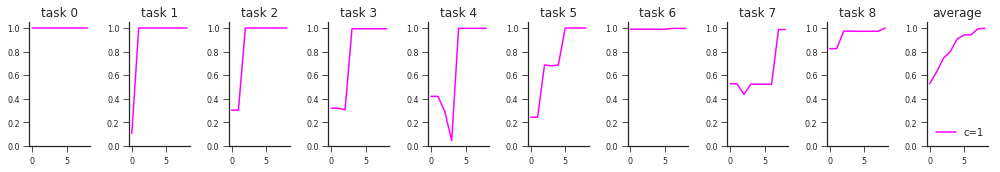

In [38]:
figure(figsize=(14, 2.5))
axs = [subplot(1,n_tasks+1,1)]#, None, None]
for i in range(1, n_tasks + 1):
    axs.append(subplot(1, n_tasks+1, i+1, sharex=axs[0], sharey=axs[0]))
    
keys = list(data['mean'].keys())
sorted_keys = np.sort(keys)

for cval in sorted_keys:
    mean_vals = data['mean'][cval]
    std_vals = data['std'][cval]
    for j in range(n_tasks):
        colorVal = scalarMap.to_rgba(np.log(cval))
        # axs[j].plot(evals[:, j], c=colorVal)
        axs[j].errorbar(range(n_tasks), mean_vals[:, j], yerr=std_vals[:, j]/np.sqrt(n_stats), c=colorVal)
    label = "c=%g"%cval
    average = mean_vals.mean(1)  #Taking the average of cross validation accuracies accross all tasks after learning each task
    axs[-1].plot(average, c=colorVal, label=label)
    
for i, ax in enumerate(axs):
    ax.legend(loc='best')
    ax.set_title((['task %d'%j for j in range(n_tasks)] + ['average'])[i])
gcf().tight_layout()
sns.despine()
plt.savefig('2Attack_Accuracy_AWID_Saturation_Detection.pdf')

In [39]:
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

def simple_axis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


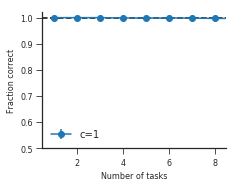

In [40]:
#Fractional Correctness = Average of cross validation accuracies of learned tasks only after training each task 
fig = plt.figure(figsize=(3.3,2.5))
ax = plt.subplot(111)

for cval in sorted_keys:
    mean_stuff = []
    std_stuff = []
    for i in range(len(data['mean'][cval])):
        mean_stuff.append(data['mean'][cval][i][:i+1].mean())
        std_stuff.append(np.sqrt((data['std'][cval][i][:i+1]**2).sum())/(n_stats*np.sqrt(n_stats)))
    # plot(range(1,n_tasks+1), mean_stuff, 'o-', label="c=%g"%cval)
    errorbar(range(1,n_tasks+1), mean_stuff, yerr=std_stuff, fmt='o-', label="c=%g"%cval)
        
axhline(data['mean'][cval][0][0], linestyle='--', color='k')
xlabel('Number of tasks')
ylabel('Fraction correct')
legend(loc='best')
xlim(0.5, 8.5)
ylim(0.5, 1.02)
# grid('on')
# sns.despine()
simple_axis(ax)
plt.savefig('2attack_fractional_correct_AWID.pdf')